# Cars Price Prediction

TODOs
* Add the github link
* Add the kaggle info(maybe a slide about this?)
* Add the author here too

In [123]:
from pathlib import Path
import shutil

import kagglehub
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_theme(context='notebook', style='ticks')

In [95]:
DATA_PATH = Path('../data/vehicles.csv')
DATA_PATH.parent.mkdir(parents=True, exist_ok=True)

if not DATA_PATH.exists():
    print('Local vehicles.csv not found; downloading with kagglehub...')
    download_dir = Path(kagglehub.dataset_download('austinreese/craigslist-carstrucks-data'))
    source_csv = download_dir / 'vehicles.csv'
    if not source_csv.exists():
        raise FileNotFoundError(
            f"'vehicles.csv' not present in downloaded dataset directory {download_dir}."
        )
    shutil.copy(source_csv, DATA_PATH)
    print(f'Copied dataset to {DATA_PATH.resolve()}')

df = pd.read_csv(DATA_PATH)

print(f'Loaded {len(df):,} rows and {df.shape[1]} columns from {DATA_PATH}')

required_columns = ['model', 'manufacturer', 'year', 'fuel', 'price']
for col in required_columns:
    if col in df.columns and df[col].dtype == object:
        df[col] = df[col].str.strip().replace({'': pd.NA})

before_filter = len(df)
df = df.dropna(subset=[col for col in required_columns if col in df.columns])
after_dropna = len(df)
dropped_na = before_filter - after_dropna
print(f'Removed {dropped_na:,} rows with missing values in {required_columns}. Remaining: {after_dropna:,}')

price_min, price_max = 1000, 40000
df = df[(df['price'] >= price_min) & (df['price'] <= price_max)]
after_price_filter = len(df)
dropped_price = after_dropna - after_price_filter
print(f'Removed {dropped_price:,} rows outside price range [{price_min}, {price_max}]. Remaining: {after_price_filter:,}')

display(df.head())

Loaded 426,880 rows and 26 columns from ../data/vehicles.csv
Removed 25,413 rows with missing values in ['model', 'manufacturer', 'year', 'fuel', 'price']. Remaining: 401,467
Removed 69,001 rows outside price range [1000, 40000]. Remaining: 332,466


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,NaN,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


In [96]:
df.type.unique()

array(['pickup', 'truck', 'other', nan, 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', 'wagon', 'van',
       'bus'], dtype=object)

In [97]:
print('Column information:')
df.info(show_counts=True)


Column information:
<class 'pandas.core.frame.DataFrame'>
Index: 332466 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            332466 non-null  int64  
 1   url           332466 non-null  object 
 2   region        332466 non-null  object 
 3   region_url    332466 non-null  object 
 4   price         332466 non-null  int64  
 5   year          332466 non-null  float64
 6   manufacturer  332466 non-null  object 
 7   model         332466 non-null  object 
 8   condition     213148 non-null  object 
 9   cylinders     199428 non-null  object 
 10  fuel          332466 non-null  object 
 11  odometer      330896 non-null  float64
 12  title_status  327416 non-null  object 
 13  transmission  331192 non-null  object 
 14  VIN           203097 non-null  object 
 15  drive         232018 non-null  object 
 16  size          97215 non-null   object 
 17  type          263668 non-null  o

In [98]:
candidate_features = [
    'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
    'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
    'paint_color', 'state', 'region', 'lat', 'long', 'posting_date', 'description',
]
available = [col for col in candidate_features if col in df.columns]
if not available:
    raise ValueError('None of the expected feature columns are present in the dataset.')

feature_summary = pd.DataFrame({
    'dtype': df[available].dtypes.astype(str),
    'non_null': df[available].notna().sum(),
    'missing_pct': df[available].isna().mean().mul(100).round(2),
    'unique_values': df[available].nunique(dropna=True),
})
feature_summary = feature_summary.sort_values('missing_pct', ascending=False)
display(feature_summary)


,dtype,non_null,missing_pct,unique_values
size,object,97215,70.76,4
cylinders,object,199428,40.02,8
condition,object,213148,35.89,6
drive,object,232018,30.21,3
paint_color,object,239019,28.11,12
type,object,263668,20.69,13
title_status,object,327416,1.52,6
long,float64,329325,0.94,47471
lat,float64,329325,0.94,46971
odometer,float64,330896,0.47,88889


In [100]:
outlier_columns = ['price', 'year', 'odometer']
available_numeric = [col for col in outlier_columns if col in df.columns]
if available_numeric:
    quantiles = df[available_numeric].quantile([0.01, 0.05, 0.5, 0.95, 0.99]).T
    quantiles.columns = [f'q{int(level*100)}' for level in quantiles.columns]
    summary_stats = df[available_numeric].describe().T
    numeric_overview = quantiles.join(summary_stats[['min', 'max', 'mean', 'std']])
    display(numeric_overview)
else:
    print('Numeric outlier columns not found in dataset.')

geo_columns = ['lat', 'long']
available_geo = [col for col in geo_columns if col in df.columns]
if len(available_geo) == 2:
    geo_summary = df[available_geo].agg(['min', 'max', 'mean']).T
    display(geo_summary)
else:
    print('Latitude/longitude columns not available for geospatial range check.')


,q1,q5,q50,q95,q99,min,max,mean,std
price,1500.0,3000.00,14906.0,36590.0,39950.0,1000.0,40000.0,16766.198291,10674.845054
year,1971.0,1999.00,2013.0,2019.0,2020.0,1900.0,2022.0,2011.019073,8.617414
odometer,115.0,9357.75,92903.0,206000.0,270000.0,0.0,10000000.0,100556.618276,169664.788068


,min,max,mean
lat,-81.838232,82.252826,38.483037
long,-159.719900,167.629911,-93.826096


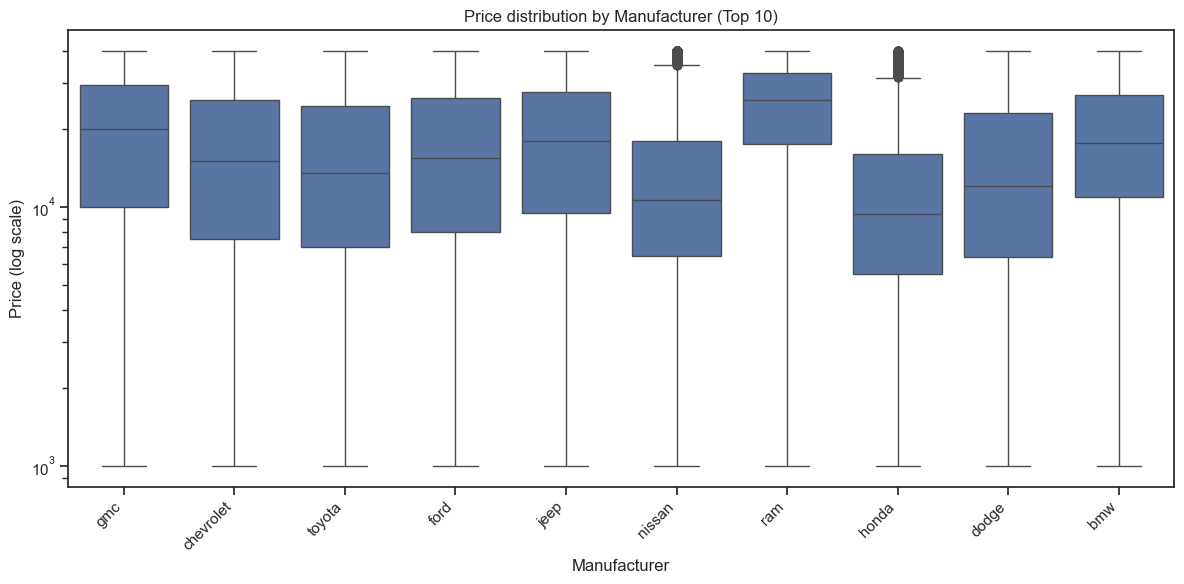

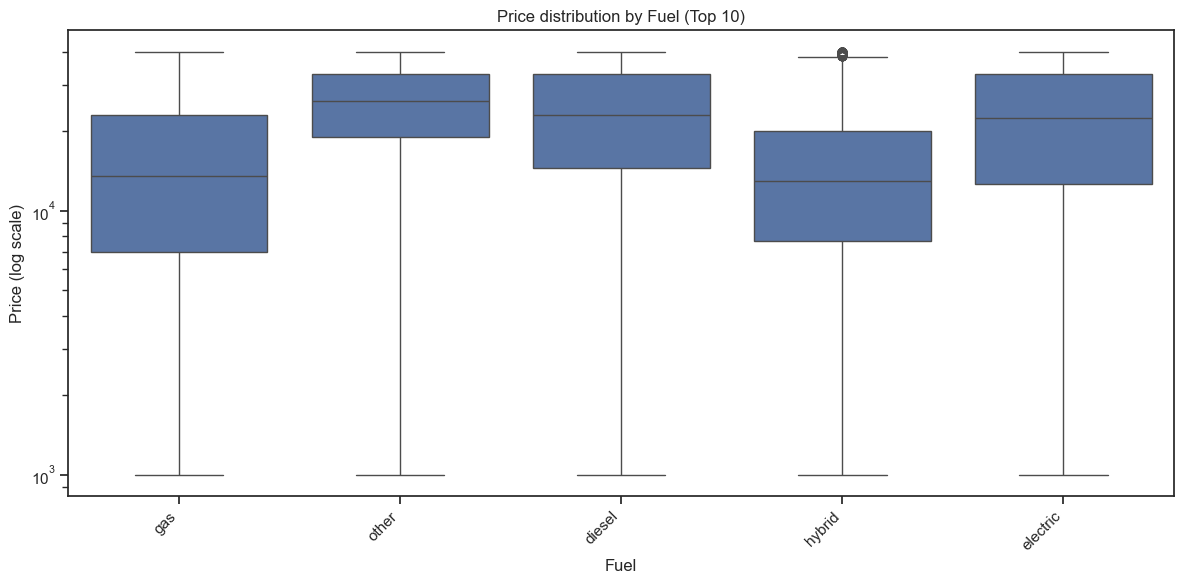

In [101]:
analysis_df = df
categorical_features = ['manufacturer', 'fuel']

for feature in categorical_features:
    if feature not in analysis_df.columns or 'price' not in analysis_df.columns:
        print(f"Skipping {feature}: missing required columns.")
        continue

    subset = analysis_df[[feature, 'price']].copy()
    subset['price'] = pd.to_numeric(subset['price'], errors='coerce')
    subset = subset.dropna(subset=['price'])
    if subset.empty:
        print(f'No data for {feature} after cleaning.')
        continue

    top_categories = (
        subset[feature]
        .astype(str)
        .str.strip()
        .replace({'': pd.NA})
        .dropna()
        .value_counts()
        .head(10)
        .index
    )
    subset = subset[subset[feature].isin(top_categories)]
    if subset.empty:
        print(f'No data remaining for top {feature} categories.')
        continue

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=subset, x=feature, y='price')
    plt.yscale('log')
    plt.title(f"Price distribution by {feature.replace('_', ' ').title()} (Top 10)")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Price (log scale)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [102]:
df_models = df.copy()
if 'model' not in df_models.columns:
    print("Column 'model' not found in dataset.")
else:
    model_series = (
        df_models['model']
        .astype(str)
        .str.strip()
        .replace({'': pd.NA})
        .dropna()
    )
    top_models = model_series.value_counts().head(50)
    top_model_set = set(top_models.index)
    print(f'Top 50 models cover {len(top_model_set)} unique names.')
    display(top_models.to_frame(name='listing_count'))

    before_model_filter = len(df)
    df = df[df['model'].astype(str).str.strip().isin(top_model_set)].copy()
    after_model_filter = len(df)
    print(f'Filtered dataset down to top 50 models: {after_model_filter:,} rows (removed {before_model_filter - after_model_filter:,}).')


Top 50 models cover 50 unique names.


,listing_count
model,
f-150,6104
silverado 1500,3954
1500,3176
camry,2689
accord,2595
civic,2480
escape,2445
silverado,2344
wrangler,2344


Filtered dataset down to top 50 models: 83,777 rows (removed 248,689).


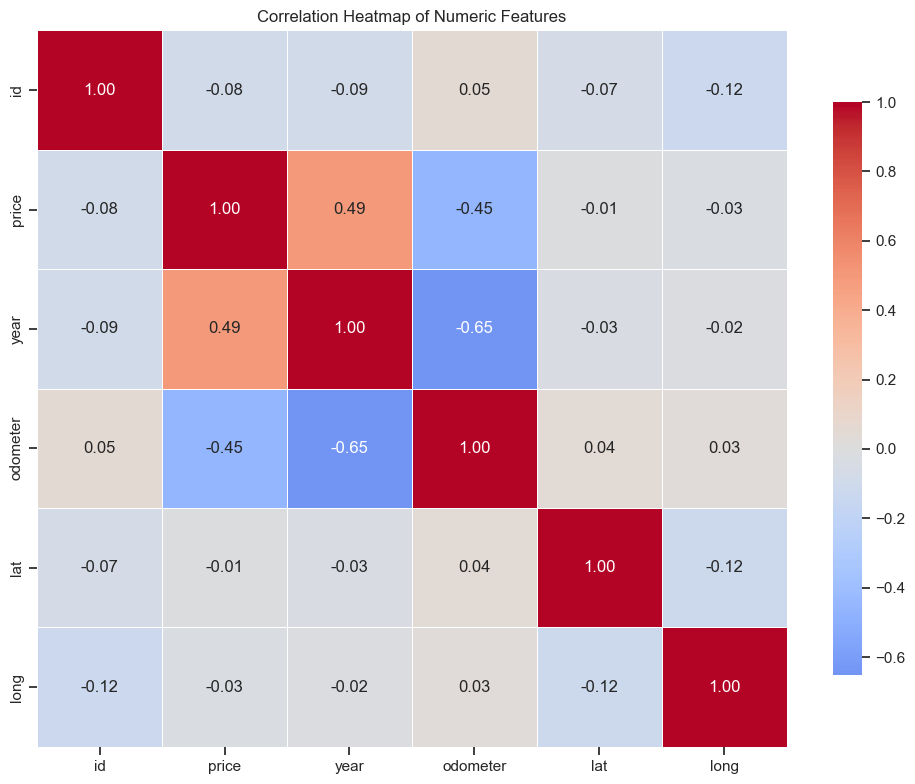

In [103]:
analysis_df = df_filtered if 'df_filtered' in globals() else df
numeric_cols = (
    analysis_df.select_dtypes(include=['number'])
    .loc[:, analysis_df.select_dtypes(include=['number']).notna().sum() > 0]
)

if numeric_cols.shape[1] >= 2:
    corr_matrix = numeric_cols.corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt='.2f',
        linewidths=0.5,
        cbar_kws={'shrink': 0.8},
    )
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns available to compute correlation heatmap.')

In [104]:
pd.to_datetime(df_filtered.posting_date)

/var/folders/27/vdtx5x_56gqbt5fcpqyqp4xh0000gn/T/ipykernel_53141/483709050.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  pd.to_datetime(df_filtered.posting_date)


27        2021-05-04 12:31:18-05:00
28        2021-05-04 12:31:08-05:00
29        2021-05-04 12:31:25-05:00
30        2021-05-04 10:41:31-05:00
31        2021-05-03 14:02:03-05:00
                    ...            
426875    2021-04-04 03:21:31-06:00
426876    2021-04-04 03:21:29-06:00
426877    2021-04-04 03:21:17-06:00
426878    2021-04-04 03:21:11-06:00
426879    2021-04-04 03:21:07-06:00
Name: posting_date, Length: 394306, dtype: object

## Preprocessing
Construct feature matrix `X` and target vector `y` from `year`, `model`, `manufacturer`, and `fuel`, with `price` as the target. Categorical fields are one-hot encoded to produce a numeric design matrix.


In [105]:
target_column = 'price'
feature_columns = ['year', 'model', 'manufacturer', 'fuel']

missing_columns = [col for col in feature_columns + [target_column] if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing expected columns: {missing_columns}")

y = pd.to_numeric(df[target_column], errors='coerce')
X_features = df[feature_columns].copy()
X_features['year'] = pd.to_numeric(X_features['year'], errors='coerce')

combined = pd.concat([X_features, y], axis=1).dropna()
y = combined[target_column]
X_features = combined[feature_columns]

categorical_cols = ['model', 'manufacturer', 'fuel']
X = pd.get_dummies(X_features, columns=categorical_cols, drop_first=True, dtype='int64')

print(f'Design matrix shape: {X.shape}')
print(f'Target vector length: {len(y)}')
display(X.head())
display(y.head())

Design matrix shape: (83777, 67)
Target vector length: 83777


,year,model_2500,model_accord,model_altima,model_camry,model_charger,model_cherokee,model_civic,model_corolla,model_corvette,model_cr-v,model_cruze,model_edge,model_elantra,model_equinox,model_escape,model_explorer,model_f-150,model_f-250,model_f150,model_focus,model_forester,model_fusion,model_grand caravan,model_grand cherokee,model_highlander,model_impala,model_jetta,model_malibu,model_mustang,model_odyssey,model_outback,model_pilot,model_prius,model_rav4,model_rogue,model_sentra,model_sienna,model_sierra,model_sierra 1500,model_silverado,model_silverado 1500,model_silverado 2500hd,model_sonata,model_soul,model_tacoma,model_tahoe,model_tundra,model_wrangler,model_wrangler unlimited,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_kia,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
28,2010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
34,2019.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
37,1992.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
59,2012.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
159,2017.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


28     22590
34     35000
37      4500
59     14000
159    19000
Name: price, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
)

print(f'Training set: {X_train.shape[0]:,} rows, Test set: {X_test.shape[0]:,} rows')
display(X_train.head())
display(y_train.head())

Training set: 58,643 rows, Test set: 25,134 rows


,year,model_2500,model_accord,model_altima,model_camry,model_charger,model_cherokee,model_civic,model_corolla,model_corvette,model_cr-v,model_cruze,model_edge,model_elantra,model_equinox,model_escape,model_explorer,model_f-150,model_f-250,model_f150,model_focus,model_forester,model_fusion,model_grand caravan,model_grand cherokee,model_highlander,model_impala,model_jetta,model_malibu,model_mustang,model_odyssey,model_outback,model_pilot,model_prius,model_rav4,model_rogue,model_sentra,model_sienna,model_sierra,model_sierra 1500,model_silverado,model_silverado 1500,model_silverado 2500hd,model_sonata,model_soul,model_tacoma,model_tahoe,model_tundra,model_wrangler,model_wrangler unlimited,manufacturer_chrysler,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_kia,manufacturer_nissan,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
100825,2001.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
94235,2002.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
399246,2015.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
304469,2018.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
279452,2011.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


100825     4795
94235      7500
399246    31900
304469    17298
279452    19995
Name: price, dtype: int64

In [108]:
y_train.min()

np.int64(1000)

## Modeling
Fit a baseline linear regression model on the preprocessed data and report RMSE and R² for both training and test sets.


In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

if 'X_train' not in globals():
    raise ValueError('Run the preprocessing and train/test split cells before modeling.')

model = LinearRegression()
model.fit(X_train, y_train)

def evaluate(features, target):
    predictions = model.predict(features)
    rmse = np.sqrt(mean_squared_error(target, predictions))
    r2 = r2_score(target, predictions)
    return rmse, r2

metrics = {
    'train': evaluate(X_train, y_train),
    'test': evaluate(X_test, y_test),
}

results_df = pd.DataFrame(
    {
        'RMSE': {k: v[0] for k, v in metrics.items()},
        'R^2': {k: v[1] for k, v in metrics.items()},
    }
)

display(results_df)

,RMSE,R^2
train,6369.476077,0.586427
test,6345.657529,0.589136


### AdaBoost Regressor
Test a tree-based ensemble to capture non-linear interactions and compare against the linear baseline.


In [117]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

if 'X_train' not in globals():
    raise ValueError('Run the preprocessing and train/test split cells before modeling.')

ada_model = AdaBoostRegressor(random_state=42, n_estimators=300, learning_rate=0.4)
ada_model.fit(X_train, y_train)

def evaluate(features, target):
    predictions = ada_model.predict(features)
    rmse = np.sqrt(mean_squared_error(target, predictions))
    r2 = r2_score(target, predictions)
    return rmse, r2

metrics = {
    'train': evaluate(X_train, y_train),
    'test': evaluate(X_test, y_test),
}

ada_results_df = pd.DataFrame(
    {
        'RMSE': {k: v[0] for k, v in metrics.items()},
        'R^2': {k: v[1] for k, v in metrics.items()},
    }
)

display(ada_results_df)

,RMSE,R^2
train,7521.490294,0.423296
test,7498.439925,0.426298


### Ridge Regression
Introduce L2 regularization to help manage multicollinearity from one-hot encoded features.


In [118]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

if 'X_train' not in globals():
    raise ValueError('Run the preprocessing and train/test split cells before modeling.')

alphas = np.logspace(-2, 2, num=20)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.alpha_
print(f'Best alpha from CV: {best_alpha:.4f}')

def evaluate(features, target):
    predictions = ridge_cv.predict(features)
    rmse = np.sqrt(mean_squared_error(target, predictions))
    r2 = r2_score(target, predictions)
    return rmse, r2

metrics = {
    'train': evaluate(X_train, y_train),
    'test': evaluate(X_test, y_test),
}

ridge_results_df = pd.DataFrame(
    {
        'RMSE': {k: v[0] for k, v in metrics.items()},
        'R^2': {k: v[1] for k, v in metrics.items()},
    }
)

display(ridge_results_df)

Best alpha from CV: 0.0100


,RMSE,R^2
train,6369.478906,0.586426
test,6345.649936,0.589137


### Random Forest Regressor
Explore a bagged tree ensemble to capture non-linearities and feature interactions with minimal tuning.


In [119]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

if 'X_train' not in globals():
    raise ValueError('Run the preprocessing and train/test split cells before modeling.')

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1,
)
rf_model.fit(X_train, y_train)

def evaluate(features, target):
    predictions = rf_model.predict(features)
    rmse = np.sqrt(mean_squared_error(target, predictions))
    r2 = r2_score(target, predictions)
    return rmse, r2

metrics = {
    'train': evaluate(X_train, y_train),
    'test': evaluate(X_test, y_test),
}

rf_results_df = pd.DataFrame(
    {
        'RMSE': {k: v[0] for k, v in metrics.items()},
        'R^2': {k: v[1] for k, v in metrics.items()},
    }
)

display(rf_results_df)

,RMSE,R^2
train,4144.326293,0.824913
test,4232.489659,0.817217


## Model Persistence
Save the fitted random forest together with the preprocessing metadata (feature order, top models, categorical levels) so downstream scoring can reproduce the transformations.


In [120]:
import pickle
from pathlib import Path

if 'rf_model' not in globals():
    raise ValueError('Train the Random Forest model cell before persisting artifacts.')
if 'X' not in globals():
    raise ValueError('Run preprocessing cells to define feature matrix X.')

artifacts = {
    'model': rf_model,
    'feature_columns': X.columns.tolist(),
    'top_models': sorted(top_model_set) if 'top_model_set' in globals() else None,
    'categorical_columns': ['model', 'manufacturer', 'fuel'],
    'price_bounds': {'min': 1000, 'max': 40000},
}

models_dir = Path('models')
models_dir.mkdir(exist_ok=True)
artifact_path = models_dir / 'random_forest_regressor.pkl'

with artifact_path.open('wb') as f:
    pickle.dump(artifacts, f)

print(f'Saved model and preprocessing metadata to {artifact_path.resolve()}')

Saved model and preprocessing metadata to /Users/adrianplattner/git/csca5922/notebooks/models/random_forest_regressor.pkl
